In [ ]:
import warnings
warnings.filterwarnings('ignore')

import re
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from scipy.stats import norm, boxcox
from scipy import stats
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



numpy version :  1.22.4
pandas version :  1.5.3
seaborn version :  0.12.2


# **TUGAS 2**

# Introduction
Notebook ini berisi **Tugas 2** yang saya kerjakan, dimana menampilkan  EDA (exploratory data analysis), pemodelan clustering serta evaluasi dari data [Mall Customer Segmentation](https://www.kaggle.com/code/fazilbtopal/popular-unsupervised-clustering-algorithms/data)

**Objective**

Terdapat 200 data. Total jumlah atribut sama dengan 5. Pada tugas ini akan ditampilkan hasil analisis unsupervised menggunakan   metode `K-means` dan dilanjutkan dengan `PCA`


`K-Means` adalah salah satu model clustering yang digunakan untuk membagi data menjadi kelompok yang homogen berdasarkan pada kemiripan di antara data tersebut. Model ini sangat populer dan sering digunakan dalam aplikasi data science karena kemudahannya dalam menggolongkan data tanpa harus memerlukan label atau kategori terlebih dahulu. Dalam contoh di atas, `K-Means` digunakan untuk melakukan segmentasi pelanggan berdasarkan pada kemiripan antara data pelanggan yang dianalisis. Dengan demikian, model `K-Means` dapat membantu dalam menggolongkan data pelanggan yang memiliki karakteristik serupa, sehingga dapat membantu bisnis dalam memahami perilaku pelanggan dan membuat strategi pemasaran yang lebih efektif.


`Principal component analysis` `(PCA)` adalah suatu teknik analisis yang digunakan dalam bidang statistika dan juga data science. Dengan memanfaatkan teknik analisis ini, Anda dapat meringkas informasi yang tercantum dalam tabel data besar hingga menjadi beberapa kumpulan indeks ringkasan yang lebih kecil

**Instruction**<br>
* Exploratory Data Analysis
* Modeling
* Evaluasi
* Insight


## Load Data

In [ ]:
from google.colab import files
uploade = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
mall = pd.read_csv('Mall_Customers.csv')
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## **Exploratory Data Analysis**



In [ ]:
mall.shape

(200, 5)

In [ ]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Dari informasi diatas, sudah dapat dipastikan pada dataset **Mall Customer Segmentation** **ini tidak ada** *missing values*

In [ ]:
# Menghilangkan variabel yang tidak digunakan
mall = mall.drop('CustomerID', axis=1)

**Menampilkan korelasi antar variabel**

<Axes: >

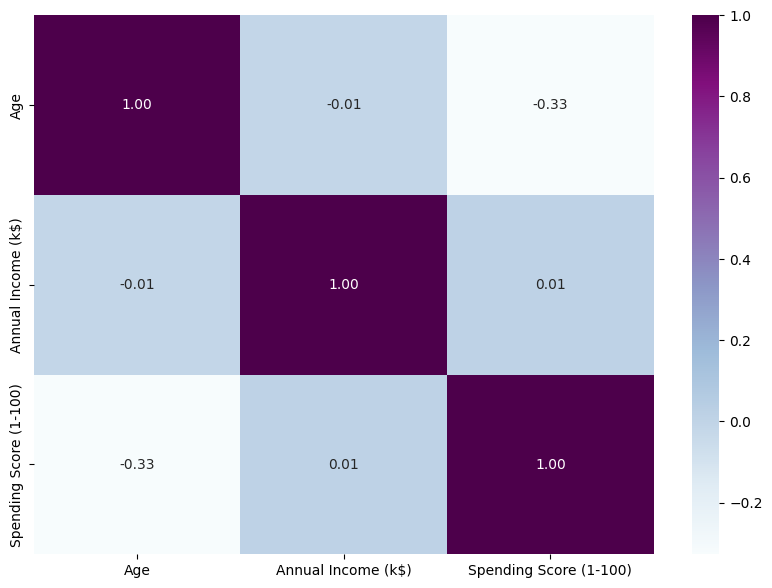

In [ ]:
corr_= mall.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

**Plotting Distribusi untuk setiap kolom atau atribut data numerik**

In [ ]:
numerik=[i for i in mall.columns if mall[i].dtypes != 'object']

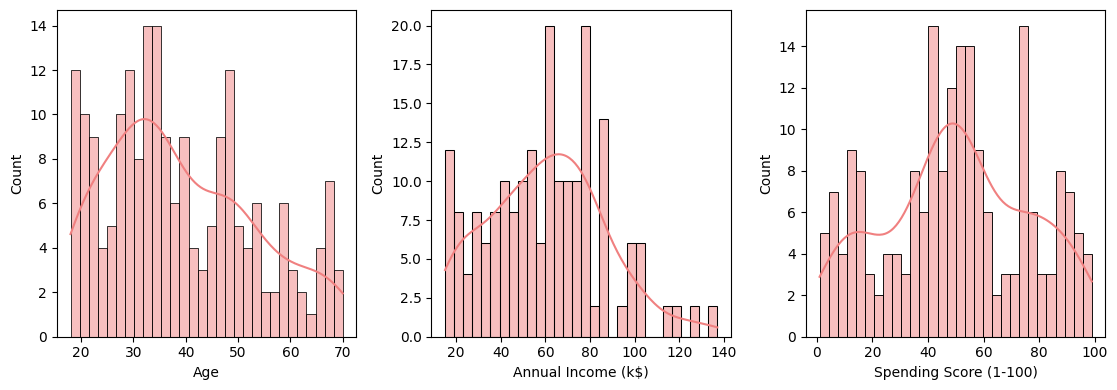

In [ ]:
plt.figure(figsize=(15, 4))
for i in range(0, len(numerik)):
    plt.subplot(1, 4, i+1)
    sns.histplot(mall[numerik[i]], color='Lightcoral', kde=True, bins = 30)
    plt.tight_layout()

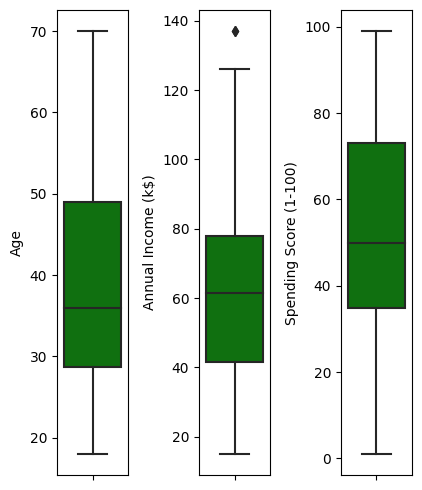

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(0, len(numerik)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=mall[numerik[i]],color='green',orient='v')
    plt.tight_layout()

**Distribusi data untuk laki-laki dan perempuan**

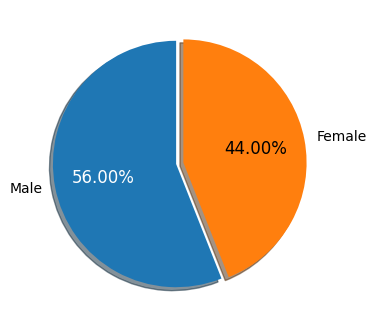

In [ ]:
values = mall['Gender'].value_counts()
labels = ['Male', 'Female']

fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True,
                                   startangle=90, explode=explode)

plt.setp(texts, color='black')
plt.setp(autotexts, size=12, color='white')
autotexts[1].set_color('black')
plt.show()

**Melihat detail data dengan pairplot**

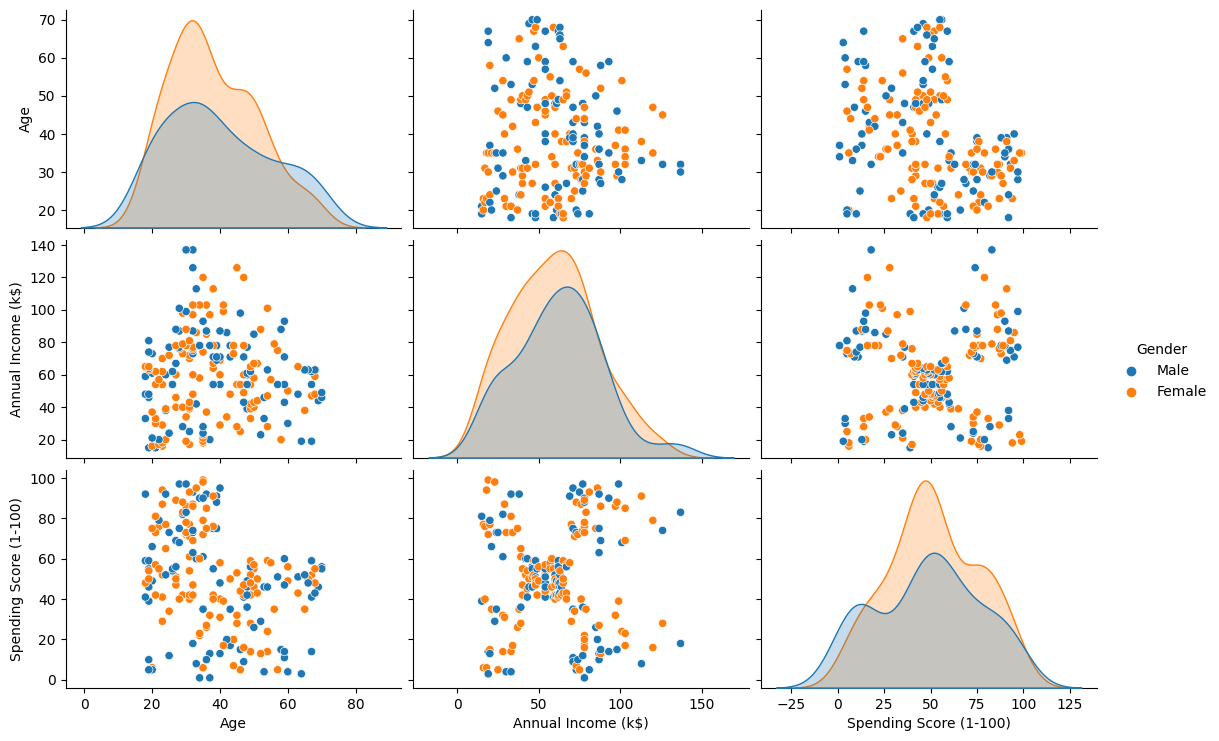

In [ ]:
X = mall.drop(['Gender'], axis=1)
sns.pairplot(mall,hue='Gender', aspect=1.5)
plt.show()

Dari plot di atas kita melihat bahwa gender tidak memiliki hubungan langsung dengan segmentasi pelanggan. Selanjutnya dapat dihentikan dan dilanjtkan dengan fitur lain, itulah sebabnya dibuat parameter X untuk selanjutnya.

## Scaling

In [ ]:
mall = mall.drop('Gender', axis=1)
sc_mall = StandardScaler()
mall_std = sc_mall.fit_transform(mall.astype(float))

## **MODELING**

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(mall_std)

In [ ]:
df_mall_std = pd.DataFrame(data=mall_std, columns=list(mall))

In [ ]:
df_mall_std['clusters'] = kmeans.labels_
mall['clusters'] = kmeans.labels_

In [ ]:
mall.head(3)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,19,15,39,3
1,2,21,15,81,3
2,3,20,16,6,0


## **EVALUASI**

## Inertia

<Axes: >

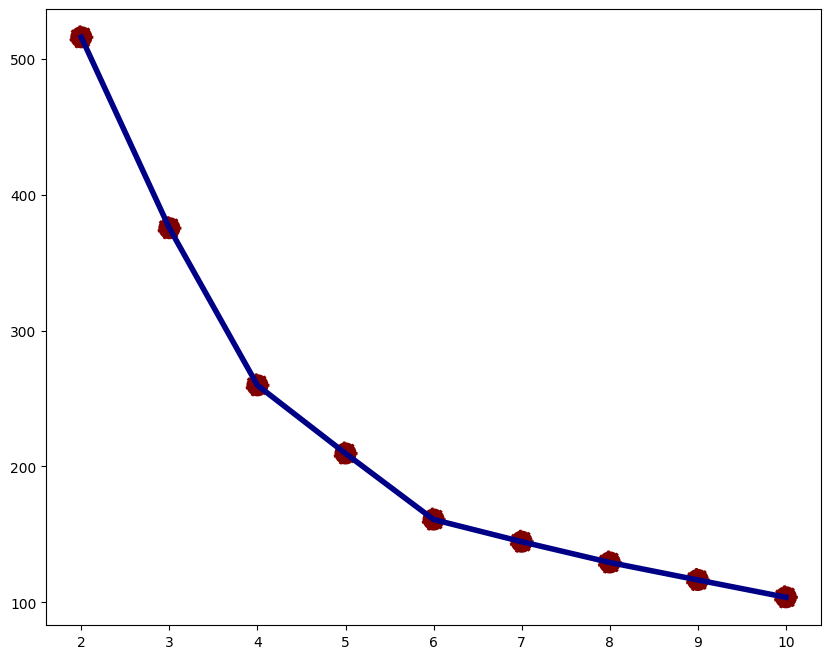

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(mall_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

Berdasarkan Elbow method diatas serta teori dimana kita dapat memilih cluster ketika ada perubahan inertia yang signifikan. Maka pada data ini terdapat kemungkinan adanya **4 cluster**

## Silhouette score

In [ ]:
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
arr_silhouette_score_mahalanobis = []
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(mall_std)
    preds = kmeans.predict(mall_std)

    score_mahalanobis = silhouette_score(mall_std, preds, metric='mahalanobis')
    arr_silhouette_score_mahalanobis.append(score_mahalanobis)

    score_euclidean = silhouette_score(mall_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

## **INSIGHT**

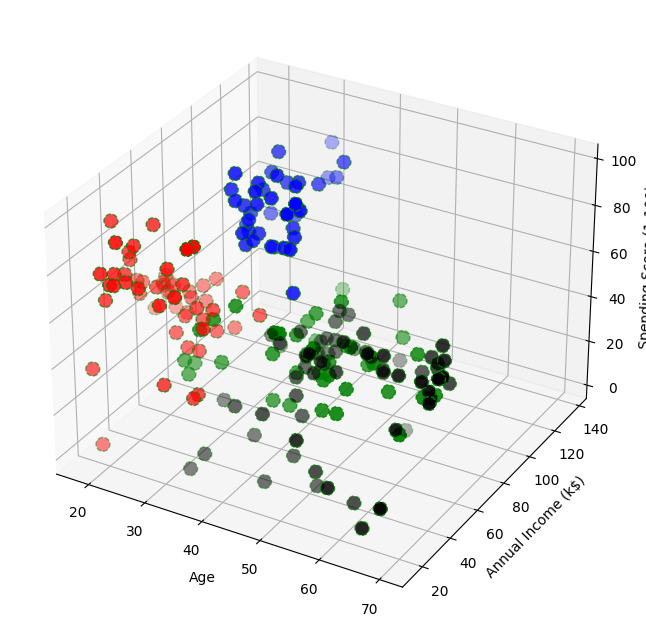

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mall.Age[mall.clusters == 0], mall["Annual Income (k$)"][mall.clusters == 0], mall["Spending Score (1-100)"][mall.clusters == 0], c='blue', s=100, edgecolor='green',linestyle='--')
ax.scatter(mall.Age[mall.clusters == 1], mall["Annual Income (k$)"][mall.clusters == 1], mall["Spending Score (1-100)"][mall.clusters == 1], c='red', s=100, edgecolor='green',linestyle='--')
ax.scatter(mall.Age[mall.clusters == 2], mall["Annual Income (k$)"][mall.clusters == 2], mall["Spending Score (1-100)"][mall.clusters == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(mall.Age[mall.clusters == 3], mall["Annual Income (k$)"][mall.clusters == 3], mall["Spending Score (1-100)"][mall.clusters == 3], c='black', s=100, edgecolor='green',linestyle='--')


plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [ ]:
mall

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,19,15,39,3
1,2,21,15,81,3
2,3,20,16,6,0
3,4,23,16,77,3
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,1
196,197,45,126,28,4
197,198,32,126,74,1
198,199,32,137,18,4


**Karena sulit melihat hasil clustering pada visualisasi 3d maka kita akan visualisasi 2d menggunakan PCA**

In [ ]:
pca = PCA(n_components=2)

pca.fit(mall_std)
pcs = pca.transform(mall_std)

mall_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
mall_pca['clusters'] = mall['clusters']
mall_pca.head()

,PC 1,PC 2,clusters
0,-0.615720,-1.763481,1
1,-1.665793,-1.820747,1
2,0.337862,-1.674799,1
3,-1.456573,-1.772430,1
4,-0.038465,-1.662740,1


<Axes: xlabel='PC 1', ylabel='PC 2'>

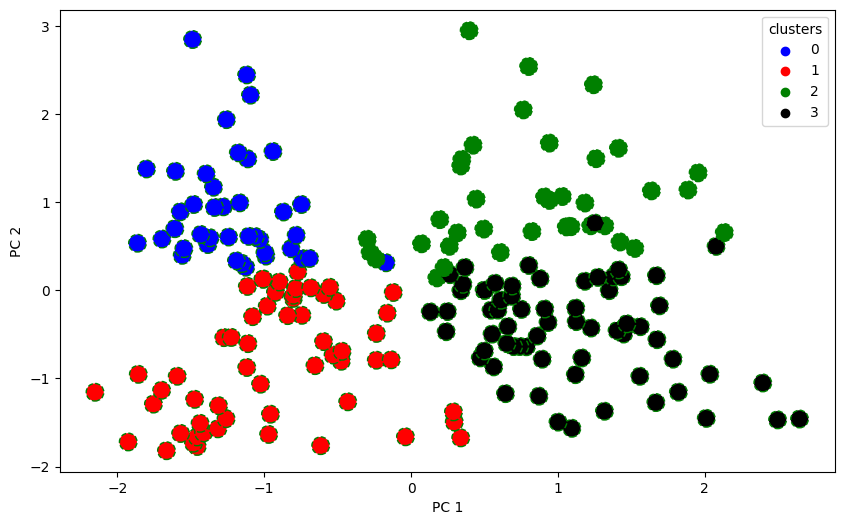

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='green',
    linestyle='--',
    data=mall_pca,
    palette=['blue','red','green','black'],
    s=160,
    ax=ax
)